In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go # 그래프 객체 생성
from plotly.subplots import make_subplots
import datetime
import seaborn as sns 
import scipy.stats
import plotly.express as px
import os 
from scipy import stats
from sklearn import metrics
import statsmodels.formula.api as smf
import scipy.stats as st
import pylab
import csv

os.getcwd()

'c:\\Users\\seong\\Desktop\\enittproj\\enitt'

In [2]:
## merge 1, 2 데이터
data1 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 발전량.csv", encoding="ms949")
data2 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/365. 반포써밋2블럭 발전량.csv", encoding="ms949")
data3 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 환경센서.csv", encoding="ms949")
data4 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/365. 반포써밋2블럭 환경정보.csv", encoding="ms949")



data_12 = pd.concat([data2, data1])
data_34 = pd.concat([data4, data3])
ent_data_solar = data_12.reset_index().drop('index', axis=1)
ent_data_solar

ent_data_weather = data_34.reset_index().drop('index', axis=1)
ent_data_weather

,env_index,env_date,env_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp
0,1,2018-10-22,12:44:29,322,316,24.8,17.6
1,2,2018-10-22,12:45:21,320,314,25.0,17.7
2,3,2018-10-22,12:46:12,320,312,25.1,17.9
3,4,2018-10-22,12:47:04,326,319,24.9,18.1
4,5,2018-10-22,12:47:56,335,329,24.9,18.0
...,...,...,...,...,...,...,...
615430,683664,2020-10-22,23:19:00,0,0,6.7,8.1
615431,683665,2020-10-22,23:23:57,0,0,6.7,8.0
615432,683666,2020-10-22,23:28:53,0,0,6.7,8.0
615433,683667,2020-10-22,23:33:49,0,0,6.7,8.0


In [3]:
## 파일불러오기 ( 추가데이터 포함되어 있는 것은 제외 )
# def ent_loadfile(solar_path, weather_path):
#     ent_data_solar = pd.read_csv(solar_path)
#     ent_data_weather = pd.read_csv(weather_path)

#     return ent_data_solar, ent_data_weather


# ent_data_solar, ent_data_weather = ent_loadfile(
#     "./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 발전량.csv", 
#     "./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 환경센서.csv")

# ent_data_solar["pow_date"].unique() ## 약 2018-11-26~ 2020-03-02 
# ent_data_weather["env_date"].unique() ## 약 2018-11-26 ~ 2020-03-03  

# -> low data인 환경정보로 정리 필요 // 

## 외부데이터 불러오기 
def other_loadfile(a, b, c): ## 임의로 수정 필요 
    other_data_dummy1 = pd.read_csv(a, encoding="ms949")
    other_data_dummy2 = pd.read_csv(b, encoding="ms949")
    other_data_dummy3 = pd.read_csv(c, encoding="ms949")

    return other_data_dummy1, other_data_dummy2, other_data_dummy3

other_data_dummy1, other_data_dummy2, other_data_dummy3 = other_loadfile(
    "./ENITT_SOLAR_DATA/re_allweather/allweather2018.csv",
    "./ENITT_SOLAR_DATA/re_allweather/allweather2019.csv",
    "./ENITT_SOLAR_DATA/re_allweather/allweather2020.csv")


other_data_dummyall = other_data_dummy1.merge(other_data_dummy2, how="outer").merge(other_data_dummy3, how="outer")
other_data_weather = other_data_dummyall[other_data_dummyall["지점명"] == "수원"]
other_data_weather["지점명"].unique()

other_data_dummy1 = pd.read_csv("./ENITT_SOLAR_DATA/otherdata/otherdata.csv", encoding="ms949")
other_data_solar = other_data_dummy1[other_data_dummy1["발전기명"] == "안산연성정수장태양광"]
other_data_solar["발전기명"].unique()
# 2019-06-16 13:00
# ent_data_weather.loc[ent_data_weather["env_date"] == "2019-06-16"]

# print()
ent_data_solar1 = ent_data_solar[ent_data_solar["pow_id"] == 2]
ent_data_weather


,env_index,env_date,env_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp
0,1,2018-10-22,12:44:29,322,316,24.8,17.6
1,2,2018-10-22,12:45:21,320,314,25.0,17.7
2,3,2018-10-22,12:46:12,320,312,25.1,17.9
3,4,2018-10-22,12:47:04,326,319,24.9,18.1
4,5,2018-10-22,12:47:56,335,329,24.9,18.0
...,...,...,...,...,...,...,...
615430,683664,2020-10-22,23:19:00,0,0,6.7,8.1
615431,683665,2020-10-22,23:23:57,0,0,6.7,8.0
615432,683666,2020-10-22,23:28:53,0,0,6.7,8.0
615433,683667,2020-10-22,23:33:49,0,0,6.7,8.0


In [4]:
## DELETE COLUMN AND EDIT COLUMN

## '지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)','일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '10cm 지중온도(°C)'
#=>

## '기온', '강수량', '풍속', '풍향', '습도', '일조', '일사', '전운량', '지면온도'
reset_other_weather = other_data_weather.set_index("일시")
reset_other_weather_need = reset_other_weather[['기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)','일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '10cm 지중온도(°C)']]
reset_other_weather_need.columns = ['기온', '강수량', '풍속', '풍향', '습도', '일조', '일사', '적설', '전운량', '지중온도']
reset_other_weather_need.fillna(0, inplace=True)
reset_other_weather_need



,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도
일시,,,,,,,,,,
2018-01-01 00:00,-1.8,0.0,2.0,290.0,43.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 01:00,-2.6,0.0,0.9,270.0,46.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 02:00,-3.0,0.0,1.1,320.0,48.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 03:00,-4.2,0.0,0.4,0.0,58.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 04:00,-5.3,0.0,0.0,0.0,65.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-10-31 19:00,14.2,0.0,1.0,270.0,65.0,0.0,0.0,0.0,8.0,0.0
2020-10-31 20:00,14.7,0.0,1.3,230.0,63.0,0.0,0.0,0.0,10.0,0.0
2020-10-31 21:00,14.7,0.0,1.7,200.0,62.0,0.0,0.0,0.0,6.0,0.0


In [15]:
## 기업 solar weather EDA -> 필요
ent_data_weather.columns 

ent_data_weather["env_levelsolar"].describe()
ent_data_weather["env_slopesolar"].describe()


## 기업 날씨 데이터 1시간 별로 groupby , ( slopesolar, levelsolar => sum) , ( modtemp, airtemp => mean )
def groupby_weather():
    ## time 구분
    dummy_time_list = []
    for i in ent_data_weather["env_time"]:
        dummy_time_list.append(i[:2])

    ent_data_weather["dummy_time"] = dummy_time_list
    dummy_groupbyall = ent_data_weather.groupby(["env_date", "dummy_time"]).mean()
    ent_data_weather_groupby = dummy_groupbyall.reset_index() ## 그룹화된 인덱스 풀기 

    ### 발전량이 거의 없는 데이터 삭제 ( 9~ 19 까지만 살린다)
    drop_data = ent_data_weather_groupby.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08", "19", "20", "21", "22", "23"]})
    ent_data_weather_sort = ent_data_weather_groupby[~drop_data].dropna()
    # print(ent_data_weather_sort)
    ent_data_weather_sort.drop("env_index", axis=1, inplace=True)

    return ent_data_weather_sort




## 기업 발전량 데이터 groupby
def groupby_solar():
    ## 필요한 컬럼만 가져오기
    ent_data_need = ent_data_solar1[["pow_date", "pow_time", "pow_totpower"]]

    ## time 구분
    dummy_time_list = []
    for i in ent_data_need["pow_time"]:
        dummy_time_list.append(i[:2])
    ent_data_need["dummy_time"] = dummy_time_list

    dummy_groupby1 = ent_data_need.groupby(["pow_date", "dummy_time"]).min()
    dummy_groupby2 = ent_data_need.groupby(["pow_date", "dummy_time"]).max()

    ## 최대값과 최솟값 차 = 1시간동안 발전한 총용량
    ## 최대값과 최솟값이 같을 경우 = 발전량 0 or 그 시간대 총발전량이 1개밖에 없어 비교 불가능한 경우
    ent_data_perhour = dummy_groupby2["pow_totpower"] - dummy_groupby1["pow_totpower"]
    ent_data_perhour = ent_data_perhour.reset_index()

    ### 발전량이 거의 없는 데이터 삭제 ( 8~ 19 까지만 살린다)
    drop_data = ent_data_perhour.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08", "19", "20", "21", "22", "23"]})
    ent_data_perhour_sort = ent_data_perhour[~drop_data].dropna()

    return ent_data_perhour_sort
    # print(ent_data_perhour_sort["dummy_time"].unique())


def groupby_solar_reset():
    ## 필요한 컬럼만 가져오기
    ent_data_need = ent_data_solar1[["pow_date", "pow_time", "pow_dcv", "pow_dca"]]

    ## time 구분
    dummy_time_list = []
    for i in ent_data_need["pow_time"]:
        dummy_time_list.append(i[:2])
    ent_data_need["dummy_time"] = dummy_time_list

    ent_data_need["watt"] = ent_data_need["pow_dcv"] * ent_data_need["pow_dca"]

    ## RESET 발전량 :: 직류 전압 X 직류 전류 : 발전량 ,, GROUPBY해서 직류X전류 의 평균량으로 구한다
    ent_data_perhour = ent_data_need.groupby(["pow_date", "dummy_time"]).mean()
    ent_data_perhour = ent_data_perhour.reset_index()


    drop_data = ent_data_perhour.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08", "19", "20", "21", "22", "23"]})
    ent_data_perhour_sort = ent_data_perhour[~drop_data].dropna()

    return ent_data_perhour_sort

### weather, solar join
def join_weather_solar(a, b):
    sub_index1 = a["env_date"] + " " + a["dummy_time"] + ":00"
    a.index = sub_index1

    sub_index2 = b["pow_date"] + " " + b["dummy_time"] + ":00"
    b.index = sub_index2

    joinset = a.join(b[["pow_dcv", "pow_dca", "watt" ]])
    ent_data_solar_weather = joinset.dropna()


    return ent_data_solar_weather

ent_data_weather_sort = groupby_weather()
ent_data_perhour_sort = groupby_solar_reset()
ent_data_solar_weather = join_weather_solar(ent_data_weather_sort, ent_data_perhour_sort)
ent_data_solar_weather
# pow_perhour 
# sns.boxplot(ent_data_weather_sort["env_slopesolar"])
# sns.boxplot(ent_data_weather_sort["env_levelsolar"])
# sns.boxplot(data = ent_data_weather_sort[["env_slopesolar", "env_levelsolar"]])
# ent_data_weather_sort[["env_slopesolar", "env_levelsolar"]]

# print(len(joinset) - 2504)


,env_date,dummy_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt
2018-10-22 12:00,2018-10-22,12,333.375000,321.937500,25.050000,17.881250,440.000000,5.634615,2478.961538
2018-10-22 13:00,2018-10-22,13,490.514286,563.442857,28.157143,18.405714,437.610169,6.477966,2835.030508
2018-10-22 14:00,2018-10-22,14,368.214286,426.042857,26.777143,19.221429,442.080645,4.809677,2121.775806
2018-10-22 15:00,2018-10-22,15,242.214286,294.400000,21.861429,18.455714,452.500000,2.990323,1346.912903
2018-10-22 16:00,2018-10-22,16,116.159420,132.362319,18.288406,17.346377,441.347826,1.184058,532.931884
...,...,...,...,...,...,...,...,...,...
2020-10-22 13:00,2020-10-22,13,591.000000,775.615385,25.476923,16.830769,509.538462,0.000000,0.000000
2020-10-22 14:00,2020-10-22,14,491.916667,695.333333,23.758333,17.483333,509.833333,0.000000,0.000000
2020-10-22 15:00,2020-10-22,15,385.500000,638.750000,21.791667,17.800000,509.250000,0.000000,0.000000
2020-10-22 16:00,2020-10-22,16,154.000000,280.461538,16.684615,15.915385,491.307692,0.000000,0.000000


In [16]:
## 기업, 공공 join

join_ent_other = ent_data_solar_weather.join(reset_other_weather_need)
join_ent_other["일사"].fillna(0, inplace=True)
# join_ent_other
join_ent_other["match_solar"] = join_ent_other["일사"] * 1000000 / 3600
join_ent_other_set = join_ent_other.drop(["env_date", "dummy_time"], axis=1)

## csv로 저장
join_ent_other_set.to_csv('banpo2_join.csv', encoding='utf-8')


In [17]:
join_ent_other_set.describe()

,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar
count,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000
mean,306.928125,381.967506,16.127659,10.659621,453.607249,4.220066,1935.615043,11.735505,0.119802,2.248353,204.183748,61.296486,0.647621,1.101658,0.020974,4.768668,0.021852,306.016146
std,229.872269,299.118494,12.350629,10.348960,34.745194,8.480790,3816.896642,9.977571,1.135860,1.260556,94.761123,19.429466,0.427709,0.715799,0.199733,3.944869,0.808728,198.833127
min,0.000000,0.000000,-12.568571,-14.415714,252.000000,0.000000,0.000000,-11.900000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.989752,99.521429,6.431884,2.358706,427.256366,0.498929,216.930530,3.500000,0.000000,1.300000,110.000000,48.000000,0.100000,0.470000,0.000000,0.000000,0.000000,130.555556
50%,292.538406,338.257143,14.068571,9.120807,452.546727,3.095586,1461.532576,10.600000,0.000000,2.100000,230.000000,60.000000,0.950000,1.030000,0.000000,5.000000,0.000000,286.111111
75%,489.274137,644.288043,24.982252,19.049141,481.796686,6.235529,2979.433030,19.700000,0.000000,3.000000,290.000000,75.000000,1.000000,1.630000,0.000000,9.000000,0.000000,452.777778
max,987.333333,1028.100000,53.960000,37.808571,533.323077,147.055588,66322.070084,35.900000,28.700000,13.100000,360.000000,100.000000,1.000000,3.350000,4.200000,10.000000,31.500000,930.555556


In [18]:
join_ent_other_set.corr()

,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar
env_slopesolar,1.000000,0.938294,0.586638,0.241779,0.343114,0.409519,0.409216,0.210707,-0.100240,0.063789,0.062582,-0.286117,0.496183,0.828266,-0.036115,-0.382367,-0.001340,0.828266
env_levelsolar,0.938294,1.000000,0.422307,0.082284,0.438051,0.349467,0.357601,0.053773,-0.104501,0.097289,0.159201,-0.426450,0.586168,0.826845,-0.028047,-0.507141,-0.005971,0.826845
env_modtemp,0.586638,0.422307,1.000000,0.916668,-0.297166,0.239176,0.216257,0.896700,0.007827,0.021507,-0.167533,0.022178,0.116027,0.573293,-0.139754,0.030325,0.038303,0.573293
env_airtemp,0.241779,0.082284,0.916668,1.000000,-0.522833,0.118243,0.090547,0.993384,0.048974,0.066188,-0.179008,0.128381,-0.068597,0.319893,-0.140051,0.185698,0.047055,0.319893
pow_dcv,0.343114,0.438051,-0.297166,-0.522833,1.000000,0.062868,0.092254,-0.542099,-0.099628,-0.077627,0.148868,-0.206691,0.283718,0.179902,0.013943,-0.317201,-0.023373,0.179902
pow_dca,0.409519,0.349467,0.239176,0.118243,0.062868,1.000000,0.999113,0.112373,-0.037763,0.192029,0.025567,-0.101686,0.198459,0.376716,-0.039727,-0.155052,-0.000241,0.376716
watt,0.409216,0.357601,0.216257,0.090547,0.092254,0.999113,1.000000,0.084983,-0.039213,0.191081,0.033432,-0.109117,0.206716,0.373431,-0.039475,-0.168243,-0.001056,0.373431
기온,0.210707,0.053773,0.896700,0.993384,-0.542099,0.112373,0.084983,1.000000,0.059740,0.094059,-0.161108,0.117871,-0.078241,0.305825,-0.138921,0.198022,0.046115,0.305825
강수량,-0.100240,-0.104501,0.007827,0.048974,-0.099628,-0.037763,-0.039213,0.059740,1.000000,-0.023552,-0.030564,0.190184,-0.153574,-0.133663,0.012356,0.136618,-0.002851,-0.133663
풍속,0.063789,0.097289,0.021507,0.066188,-0.077627,0.192029,0.191081,0.094059,-0.023552,1.000000,0.303634,-0.181255,0.147519,0.222916,0.083420,-0.082791,-0.001274,0.222916


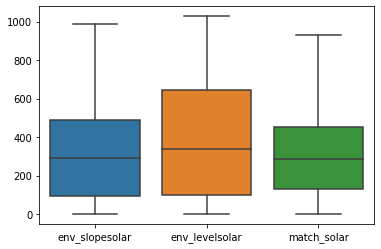

In [19]:
sns.boxplot(data = join_ent_other_set[["env_slopesolar", "env_levelsolar", "match_solar"]])

In [20]:
import scipy.stats

print(scipy.stats.pearsonr(join_ent_other_set["env_levelsolar"], join_ent_other_set["match_solar"]), scipy.stats.pearsonr(join_ent_other_set["env_slopesolar"], join_ent_other_set["match_solar"]))
print("------------------")
print(scipy.stats.pearsonr(join_ent_other_set["env_levelsolar"], join_ent_other_set["watt"]), scipy.stats.pearsonr(join_ent_other_set["env_slopesolar"], join_ent_other_set["watt"]), scipy.stats.pearsonr(join_ent_other_set["match_solar"], join_ent_other_set["watt"]))

(0.8268450787328583, 0.0) (0.8282658389837838, 0.0)
------------------
(0.35760131722399224, 3.2870067446318203e-83) (0.409215985345148, 8.427030057105356e-111) (0.37343107701377143, 3.7974474300951e-91)
